In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import LearningRateScheduler

from keras.optimizers import SGD
from keras.optimizers import Adagrad
from keras.optimizers import RMSprop
from keras.optimizers import Adam

Using TensorFlow backend.


In [3]:
batch_size = 128
num_classes = 10
epochs = 12

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
img_rows, img_cols = 28, 28
from keras import backend as K

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [6]:
print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28, 1)
y_train shape (60000,)
X_test shape (10000, 28, 28, 1)
y_test shape (10000,)


In [7]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [8]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [9]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

sgd = SGD(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
hist_sgd = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 81s 1ms/step - loss: 2.3032 - acc: 0.0995 - val_loss: 2.2942 - val_acc: 0.0840
Epoch 2/12
60000/60000 [==============================] - 84s 1ms/step - loss: 2.2933 - acc: 0.1162 - val_loss: 2.2831 - val_acc: 0.1276
Epoch 3/12
60000/60000 [==============================] - 84s 1ms/step - loss: 2.2833 - acc: 0.1369 - val_loss: 2.2721 - val_acc: 0.1850
Epoch 4/12
60000/60000 [==============================] - 83s 1ms/step - loss: 2.2734 - acc: 0.1571 - val_loss: 2.2609 - val_acc: 0.2427
Epoch 5/12
60000/60000 [==============================] - 83s 1ms/step - loss: 2.2628 - acc: 0.1832 - val_loss: 2.2490 - val_acc: 0.3119
Epoch 6/12
60000/60000 [==============================] - 82s 1ms/step - loss: 2.2524 - acc: 0.2041 - val_loss: 2.2361 - val_acc: 0.3834
Epoch 7/12
60000/60000 [==============================] - 84s 1ms/step - loss: 2.2398 - acc: 0.2263 - val_loss: 2.2220 - val_acc

In [10]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

sgd_mom = SGD(momentum=0.9, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd_mom, metrics=['accuracy'])
hist_sgd_mom = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 83s 1ms/step - loss: 0.5209 - acc: 0.8335 - val_loss: 0.1339 - val_acc: 0.9573
Epoch 2/12
60000/60000 [==============================] - 84s 1ms/step - loss: 0.1826 - acc: 0.9456 - val_loss: 0.0736 - val_acc: 0.9771
Epoch 3/12
60000/60000 [==============================] - 84s 1ms/step - loss: 0.1233 - acc: 0.9628 - val_loss: 0.0584 - val_acc: 0.9823
Epoch 4/12
60000/60000 [==============================] - 86s 1ms/step - loss: 0.1006 - acc: 0.9697 - val_loss: 0.0487 - val_acc: 0.9838
Epoch 5/12
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0846 - acc: 0.9749 - val_loss: 0.0418 - val_acc: 0.9861
Epoch 6/12
60000/60000 [==============================] - 86s 1ms/step - loss: 0.0735 - acc: 0.9776 - val_loss: 0.0392 - val_acc: 0.9864
Epoch 7/12
60000/60000 [==============================] - 83s 1ms/step - loss: 0.0656 - acc: 0.9800 - val_loss: 0.0328 - val_acc

In [11]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

sgd_nest = SGD(momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd_nest, metrics=['accuracy'])
hist_sgd_nest = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 83s 1ms/step - loss: 0.4736 - acc: 0.8520 - val_loss: 0.1385 - val_acc: 0.9569
Epoch 2/12
60000/60000 [==============================] - 84s 1ms/step - loss: 0.1840 - acc: 0.9453 - val_loss: 0.0758 - val_acc: 0.9764
Epoch 3/12
60000/60000 [==============================] - 87s 1ms/step - loss: 0.1267 - acc: 0.9619 - val_loss: 0.0570 - val_acc: 0.9827
Epoch 4/12
60000/60000 [==============================] - 88s 1ms/step - loss: 0.1030 - acc: 0.9689 - val_loss: 0.0512 - val_acc: 0.9830
Epoch 5/12
60000/60000 [==============================] - 90s 2ms/step - loss: 0.0884 - acc: 0.9734 - val_loss: 0.0434 - val_acc: 0.9860
Epoch 6/12
60000/60000 [==============================] - 91s 2ms/step - loss: 0.0756 - acc: 0.9776 - val_loss: 0.0403 - val_acc: 0.9874
Epoch 7/12
60000/60000 [==============================] - 86s 1ms/step - loss: 0.0673 - acc: 0.9792 - val_loss: 0.0353 - val_acc

In [12]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

agadrad = Adagrad(lr=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=agadrad, metrics=['accuracy'])
hist_adagrad = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 83s 1ms/step - loss: 1.6981 - acc: 0.5953 - val_loss: 1.2249 - val_acc: 0.8198
Epoch 2/12
60000/60000 [==============================] - 83s 1ms/step - loss: 1.1455 - acc: 0.7123 - val_loss: 0.8652 - val_acc: 0.8441
Epoch 3/12
60000/60000 [==============================] - 84s 1ms/step - loss: 0.9266 - acc: 0.7517 - val_loss: 0.6999 - val_acc: 0.8586
Epoch 4/12
60000/60000 [==============================] - 83s 1ms/step - loss: 0.8136 - acc: 0.7720 - val_loss: 0.6059 - val_acc: 0.8710
Epoch 5/12
60000/60000 [==============================] - 83s 1ms/step - loss: 0.7378 - acc: 0.7882 - val_loss: 0.5457 - val_acc: 0.8792
Epoch 6/12
60000/60000 [==============================] - 83s 1ms/step - loss: 0.6831 - acc: 0.8046 - val_loss: 0.5013 - val_acc: 0.8847
Epoch 7/12
60000/60000 [==============================] - 83s 1ms/step - loss: 0.6450 - acc: 0.8119 - val_loss: 0.4695 - val_acc

In [13]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

rmsprop = RMSprop(lr=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=rmsprop, metrics=['accuracy'])
hist_rmsprop = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 84s 1ms/step - loss: 0.6181 - acc: 0.8241 - val_loss: 0.2214 - val_acc: 0.9339
Epoch 2/12
60000/60000 [==============================] - 83s 1ms/step - loss: 0.2599 - acc: 0.9226 - val_loss: 0.1296 - val_acc: 0.9599
Epoch 3/12
60000/60000 [==============================] - 84s 1ms/step - loss: 0.1743 - acc: 0.9492 - val_loss: 0.0883 - val_acc: 0.9732
Epoch 4/12
60000/60000 [==============================] - 84s 1ms/step - loss: 0.1291 - acc: 0.9621 - val_loss: 0.0657 - val_acc: 0.9803
Epoch 5/12
60000/60000 [==============================] - 84s 1ms/step - loss: 0.1069 - acc: 0.9682 - val_loss: 0.0542 - val_acc: 0.9827
Epoch 6/12
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0895 - acc: 0.9733 - val_loss: 0.0490 - val_acc: 0.9839
Epoch 7/12
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0789 - acc: 0.9767 - val_loss: 0.0456 - val_acc

In [14]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

adam = Adam(lr=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
hist_adam = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 86s 1ms/step - loss: 0.6153 - acc: 0.8189 - val_loss: 0.1941 - val_acc: 0.9428
Epoch 2/12
60000/60000 [==============================] - 84s 1ms/step - loss: 0.2421 - acc: 0.9293 - val_loss: 0.1145 - val_acc: 0.9660
Epoch 3/12
60000/60000 [==============================] - 85s 1ms/step - loss: 0.1634 - acc: 0.9523 - val_loss: 0.0783 - val_acc: 0.9760
Epoch 4/12
60000/60000 [==============================] - 84s 1ms/step - loss: 0.1252 - acc: 0.9644 - val_loss: 0.0617 - val_acc: 0.9799
Epoch 5/12
60000/60000 [==============================] - 84s 1ms/step - loss: 0.1053 - acc: 0.9693 - val_loss: 0.0539 - val_acc: 0.9826
Epoch 6/12
60000/60000 [==============================] - 84s 1ms/step - loss: 0.0900 - acc: 0.9734 - val_loss: 0.0477 - val_acc: 0.9844
Epoch 7/12
60000/60000 [==============================] - 84s 1ms/step - loss: 0.0819 - acc: 0.9754 - val_loss: 0.0433 - val_acc

<Figure size 1440x576 with 0 Axes>

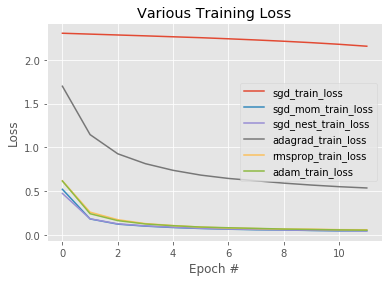

In [23]:
plt.figure(figsize=(20, 8))  
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), hist_sgd.history["loss"], label="sgd_train_loss")
plt.plot(np.arange(0, epochs), hist_sgd_mom.history["loss"], label="sgd_mom_train_loss")
plt.plot(np.arange(0, epochs), hist_sgd_nest.history["loss"], label="sgd_nest_train_loss")
plt.plot(np.arange(0, epochs), hist_adagrad.history["loss"], label="adagrad_train_loss")
plt.plot(np.arange(0, epochs), hist_rmsprop.history["loss"], label="rmsprop_train_loss")
plt.plot(np.arange(0, epochs), hist_adam.history["loss"], label="adam_train_loss")
plt.title("Various Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

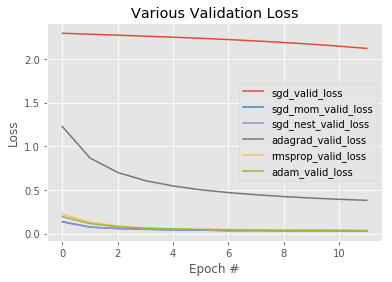

In [16]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), hist_sgd.history["val_loss"], label="sgd_valid_loss")
plt.plot(np.arange(0, epochs), hist_sgd_mom.history["val_loss"], label="sgd_mom_valid_loss")
plt.plot(np.arange(0, epochs), hist_sgd_nest.history["val_loss"], label="sgd_nest_valid_loss")
plt.plot(np.arange(0, epochs), hist_adagrad.history["val_loss"], label="adagrad_valid_loss")
plt.plot(np.arange(0, epochs), hist_rmsprop.history["val_loss"], label="rmsprop_valid_loss")
plt.plot(np.arange(0, epochs), hist_adam.history["val_loss"], label="adam_valid_loss")
plt.title("Various Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

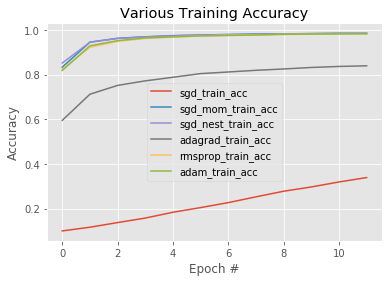

In [17]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), hist_sgd.history["acc"], label="sgd_train_acc")
plt.plot(np.arange(0, epochs), hist_sgd_mom.history["acc"], label="sgd_mom_train_acc")
plt.plot(np.arange(0, epochs), hist_sgd_nest.history["acc"], label="sgd_nest_train_acc")
plt.plot(np.arange(0, epochs), hist_adagrad.history["acc"], label="adagrad_train_acc")
plt.plot(np.arange(0, epochs), hist_rmsprop.history["acc"], label="rmsprop_train_acc")
plt.plot(np.arange(0, epochs), hist_adam.history["acc"], label="adam_train_acc")
plt.title("Various Training Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

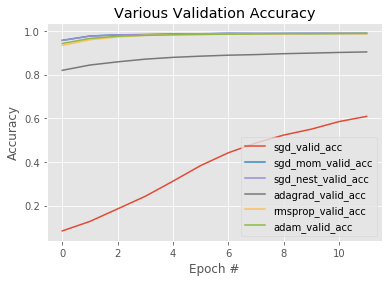

In [18]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), hist_sgd.history["val_acc"], label="sgd_valid_acc")
plt.plot(np.arange(0, epochs), hist_sgd_mom.history["val_acc"], label="sgd_mom_valid_acc")
plt.plot(np.arange(0, epochs), hist_sgd_nest.history["val_acc"], label="sgd_nest_valid_acc")
plt.plot(np.arange(0, epochs), hist_adagrad.history["val_acc"], label="adagrad_valid_acc")
plt.plot(np.arange(0, epochs), hist_rmsprop.history["val_acc"], label="rmsprop_valid_acc")
plt.plot(np.arange(0, epochs), hist_adam.history["val_acc"], label="adam_valid_acc")
plt.title("Various Validation Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend()
plt.show()